In [46]:
%matplotlib inline 
from __future__ import division
from pylab import *
import skimage as ski
from skimage import data, io, filters, exposure
from skimage.filters import rank
from skimage import img_as_float, img_as_ubyte
from skimage.morphology import disk
import skimage.morphology as mp
from skimage import util
from skimage.color import rgb2hsv, hsv2rgb, rgb2gray
from skimage.filters.edges import convolve
from matplotlib import pylab as plt
import numpy as np
from numpy import array
from IPython.display import display
from ipywidgets import interact, interactive, fixed
from ipywidgets import *
from ipykernel.pylab.backend_inline import flush_figures
from skimage import measure
from skimage.filters import threshold_otsu, threshold_local
import cv2

662 1022 30 389
((74.0, 1196.0), (0.0, 0.0), 0.0)
1116 1477 286 645
((74.0, 1196.0), (0.0, 0.0), 0.0)
227 603 337 704
((74.0, 1196.0), (0.0, 0.0), 0.0)
667 1029 432 795
((74.0, 1196.0), (0.0, 0.0), 0.0)
405 782 766 1148
((74.0, 1196.0), (0.0, 0.0), 0.0)
929 1298 776 1153
((74.0, 1196.0), (0.0, 0.0), 0.0)


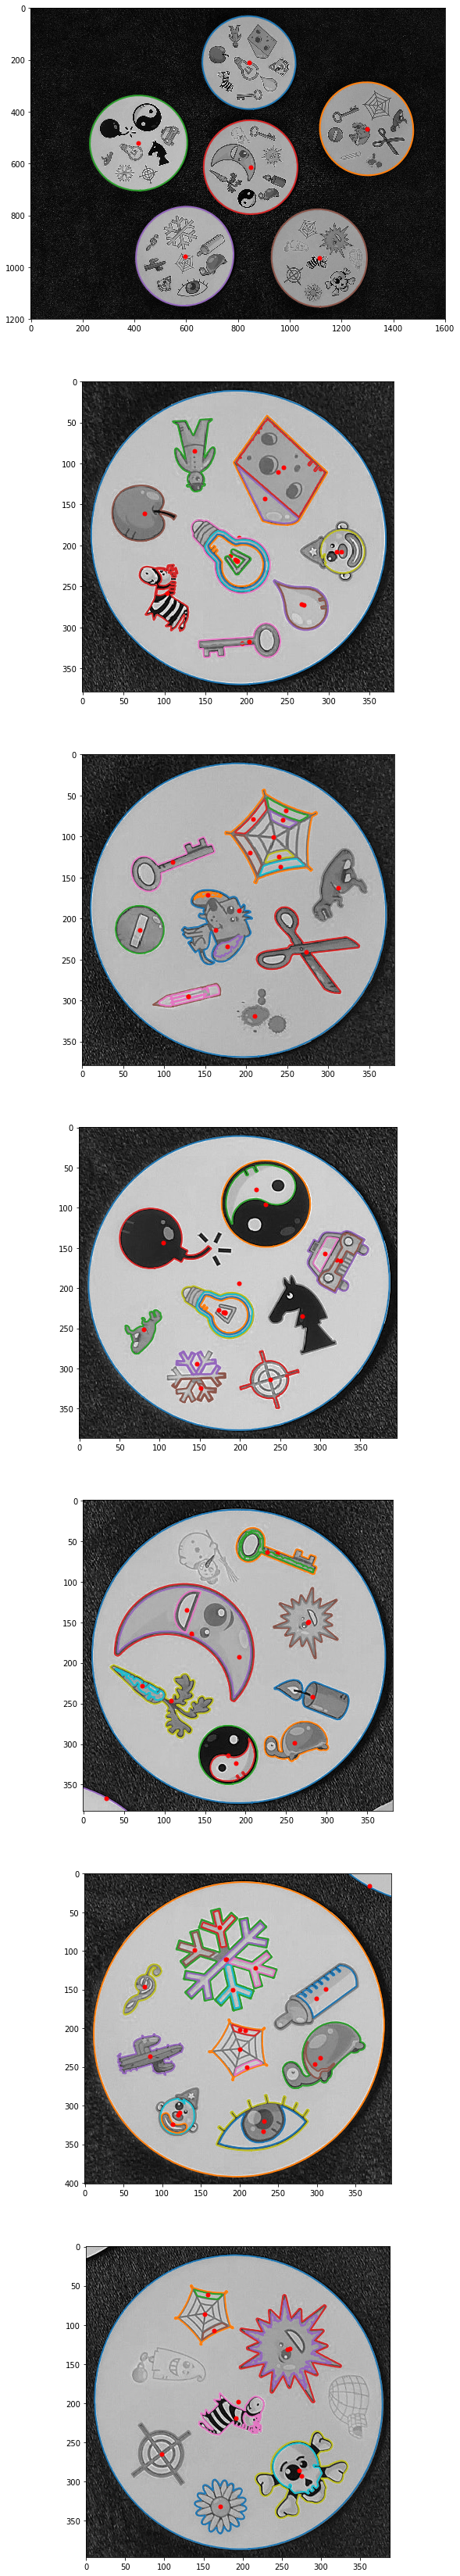

In [57]:
def dil(img):
    how_many = int((img.shape[1]-600)*((12.0-3.0)/2408.0)+3)
    for i in range(how_many):
        img = mp.erosion(img)
    return img

def treshhold(img):
    x = np.percentile(img, 3.5)
    std = np.std(img)
    if (std < 0.146): x-=(10.0/255.0)
    else:x+=(50.0/255.0)
    if (img.shape[1]>1500): x-=(5.0/255.0)
    if (std < 0.098): x-=(50.0/255.0)
    return (img > x) * 1.0
    

def increase_contrast(img):
    percmin=0.3
    percmax=2.0
    MIN = np.percentile(img, percmin)
    MAX = np.percentile(img, 100-percmax)
    norm = (img - MIN) / (MAX - MIN)
    norm[norm[:,:] > 1] = 1
    norm[norm[:,:] < 0] = 0
    return norm
    
def gamma_filter(img):
    
    return img**1.5

def to_gray(img):
    temp = rgb2hsv(img)
    temp[:,:,1] = 0
    temp2 = hsv2rgb(temp)
    return rgb2gray(temp2)

def process(img, i):
    img = to_gray(img)
    img = gamma_filter(img)
#     img = threshold_local(img, 11, 'gaussian', offset=0.3)
#     img = increase_contrast(img)
#     img = treshhold(img)
#     img = dil(img)
    return img
            

fig, ax = plt.subplots(7, 1, figsize=(20,60))

for i in range(4, 5):
    filename = "./img/dobble"+'{:02d}'.format(i)+".jpg"
    img = img_as_float(data.imread(filename))
    processed_img = process(img, i)
    contours = measure.find_contours(processed_img, 0.2)
    ax[0].imshow(processed_img, cmap='gray')
    
    j=1
    
    for n, contour in enumerate(contours):
        
        if(np.amax(contour[:,1])-np.amin(contour[:,1]) > 200):
            print(int(np.amin(contour[:,1])), int(np.amax(contour[:,1])), int(np.amin(contour[:,0])), int(np.amax(contour[:,0])))
            xmin = int(np.amin(contour[:,1]))
            xmax = int(np.amax(contour[:,1]))
            ymin = int(np.amin(contour[:,0]))
            ymax = int(np.amax(contour[:,0]))
            
            pic1 = img[ymin-10:ymax+10,xmin-10:xmax+10]
            pic1 = to_gray(pic1)

            centroid = np.sum(contour, axis=0)/len(contour)
            ax[0].plot(contour[:, 1], contour[:, 0], linewidth=2)
            ax[0].plot(centroid[1], centroid[0], marker='o', markersize=5, color="red")
            
            ax[j].imshow(pic1, cmap='gray')
            contours1 = measure.find_contours(pic1, 0.6)
            
            img2 = cv2.imread('./img/dobble04.jpg',0)
            ret,thresh = cv2.threshold(img2,127,255,0)
            im2,cont,hierarchy = cv2.findContours(thresh, 1, 2)
            cnt = cont[0]
            rect = cv2.minAreaRect(cnt)
            print(rect)
#             box = cv2.boxPoints(rect)
#             box = np.int0(box)
#             cv2.drawContours(img,[box],0,(0,0,255),2)
            
            for n, contour1 in enumerate(contours1):
                if(np.amax(contour1[:,1])-np.amin(contour1[:,1]) > 30):
                    centroid1 = np.sum(contour1, axis=0)/len(contour1)
                    ax[j].plot(contour1[:, 1], contour1[:, 0], linewidth=2)
                    ax[j].plot(centroid1[1], centroid1[0], marker='o', markersize=5, color="red")

            j+=1
            
        
    
    

    